# Einleitung

In diesem Jupyter-Notebook durchlaufen wir alle relevanten Schritte des Machine-Learnings:
1. Daten einlesen
2. Daten vorverarbeiten
3. Trainings- und Testdaten vorbereiten
4. Machine-Learning Modell definieren (hier: ein MLP)
5. Modell trainieren
6. Modell testen/anwenden
7. Modell speichern/wiederherstellen

# Verwendeter Datensatz

Wir wollen mit realen Daten arbeiten. Bei [Kaggle](https://www.kaggle.com/) können wir viele Datensätze finden. Diesen hier verwenden wir im Folgenden:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Der Datensatz enthält in den Trainingsdaten 1460 Beispiele von Häusern, wobei deren Eigenschaften und deren jeweiliger tatsächlicher Verkaufspreis aufgeführt ist.

# Daten einlesen

Die Datensätze liegen often als .csv Dateien vor. Diese können mittels der Bibliothek Pandas einfach eingelesen werden.

Wenn Pandas noch nicht installiert ist, kann diese Bibliothek mittels

    conda install pandas

unter der Anaconda Prompt installiert werden.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import pandas as pd
print(pd.__version__)

1.2.4


In [3]:
df = pd.read_csv("daten/hausbeispiele.csv")

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
df["LotShape"]

0       Reg
1       Reg
2       IR1
3       IR1
4       IR1
       ... 
1455    Reg
1456    Reg
1457    Reg
1458    Reg
1459    Reg
Name: LotShape, Length: 1460, dtype: object

In [7]:
df["LotShape"].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [8]:
df2 = pd.get_dummies(df)

In [9]:
df2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [10]:
df[0:3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [11]:
df.shape

(1460, 81)

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Spalten selektieren, Daten plotten

In [13]:
df["YearBuilt"]

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [14]:
df["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [15]:
x = df["YearBuilt"]
y = df["SalePrice"]

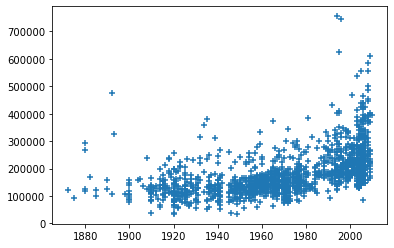

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x,y, marker="+")
plt.show()

In [17]:
data_input = df[["YearBuilt", "LotArea"]].values

In [18]:
data_input.shape

(1460, 2)

In [19]:
#data_input = df[["YearBuilt", "LotArea"]].values
data_input = df[["YearBuilt", "LotArea", "OverallQual"]].values

nr_inputs = data_input.shape[1]

In [20]:
nr_inputs

3

In [21]:
data_input

array([[ 2003,  8450,     7],
       [ 1976,  9600,     6],
       [ 2001, 11250,     7],
       ...,
       [ 1941,  9042,     7],
       [ 1950,  9717,     5],
       [ 1965,  9937,     5]])

In [22]:
data_output = df["SalePrice"].values

In [23]:
data_output

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

# Daten normalisieren

In [24]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler_input = MinMaxScaler(feature_range=(0, 1))
scaled_input_data = scaler_input.fit_transform(data_input)

In [26]:
scaled_input_data

array([[0.94927536, 0.0334198 , 0.66666667],
       [0.75362319, 0.03879502, 0.55555556],
       [0.93478261, 0.04650728, 0.66666667],
       ...,
       [0.5       , 0.03618687, 0.66666667],
       [0.56521739, 0.03934189, 0.44444444],
       [0.67391304, 0.04037019, 0.44444444]])

In [27]:
type(scaled_input_data)

numpy.ndarray

In [28]:
scaled_input_data.ndim

2

In [29]:
scaled_input_data.shape

(1460, 3)

In [30]:
scaler_output = MinMaxScaler(feature_range=(0, 1))
scaled_output_data = scaler_output.fit_transform(data_output.reshape(-1,1))

In [31]:
scaled_output_data

array([[0.24107763],
       [0.20358284],
       [0.26190807],
       ...,
       [0.321622  ],
       [0.14890293],
       [0.15636717]])

# Trainings- und Testdaten definieren

In [32]:
x_train = scaled_input_data[0:1000]
y_train = scaled_output_data[0:1000]
x_test  = scaled_input_data[1000:]
y_test  = scaled_output_data[1000:]

In [33]:
x_train.shape

(1000, 3)

In [34]:
y_train.shape

(1000, 1)

In [35]:
x_test.shape

(460, 3)

In [36]:
y_test.shape

(460, 1)

In [37]:
print(x_train[-1], "-->", y_train[-1])

[0.97101449 0.02552993 0.66666667] --> [0.23760589]


In [38]:
M = [[1,2,3], [4,5,6], [7,8,9]]
# 1 2 3
# 4 5 6
# 7 8 9

In [39]:
M[:][-1]

[7, 8, 9]

In [40]:
M2 = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [41]:
M2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [42]:
M2[:,-1]

array([3, 6, 9])

In [43]:
M2[:][-1]

array([7, 8, 9])

# MLP vorbereiten

In [5]:
# 123
import tensorflow as tf
from tensorflow import keras

tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Dense(80,
                             activation="relu",
                             input_shape=(nr_inputs,)))
model.add(keras.layers.Dense(40,
                             activation="relu"
                             ))
model.add(keras.layers.Dense(1,
                             activation="linear"))

NameError: name 'nr_inputs' is not defined

In [45]:
model.compile(optimizer='sgd',           
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

#loss=tf.keras.losses.MeanSquaredError(),

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 3,601
Trainable params: 3,601
Non-trainable params: 0
_________________________________________________________________


# MLP trainieren

In [47]:
history = model.fit(x_train,
                    y_train,
                    epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 11ms/step - loss: 0.0337 - accuracy: 5.1468e-04
Epoch 2/200
32/32 [==============================] - 0s 9ms/step - loss: 0.0099 - accuracy: 2.2427e-04
Epoch 3/200
32/32 [==============================] - 0s 11ms/step - loss: 0.0086 - accuracy: 9.1153e-05
Epoch 4/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 0.0029
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0086 - accuracy: 6.7284e-04
Epoch 6/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0079 - accuracy: 2.6069e-04
Epoch 7/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0088 - accuracy: 6.1713e-04
Epoch 8/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0070 - accuracy: 0.0014
Epoch 9/200
32/32 [==============================] - 0s 9ms/step - loss: 0.0071 - accuracy: 0.0019
Epoch 10/200
32/32 [==============================] - 0s 12ms/step - loss: 0.0087 -

In [48]:
history.history

{'loss': [0.02094261161983013,
  0.009276525117456913,
  0.00879687163978815,
  0.0083505529910326,
  0.008104544132947922,
  0.007876964285969734,
  0.007644551806151867,
  0.007421522866934538,
  0.007213834207504988,
  0.007039167452603579,
  0.006871999241411686,
  0.006710486952215433,
  0.006577055901288986,
  0.006442836485803127,
  0.006317541468888521,
  0.006181186530739069,
  0.006073099095374346,
  0.005966348573565483,
  0.005858303979039192,
  0.005764019675552845,
  0.005675881635397673,
  0.005572837311774492,
  0.0054674032144248486,
  0.0053788647055625916,
  0.0053023057989776134,
  0.0052297692745924,
  0.0051584322936832905,
  0.0050943936221301556,
  0.0050387075170874596,
  0.004977087490260601,
  0.004919140599668026,
  0.004870897624641657,
  0.004816368687897921,
  0.004772351123392582,
  0.004727365914732218,
  0.004681778606027365,
  0.004651650786399841,
  0.00461111543700099,
  0.004578114952892065,
  0.00454215332865715,
  0.004512393847107887,
  0.004482

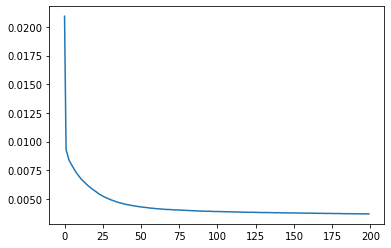

In [49]:
plt.plot(history.history["loss"])
plt.show()

# Modell testen/anwenden

In [50]:
x_test[:10]

array([[0.57971014, 0.04162752, 0.22222222],
       [0.34782609, 0.0191638 , 0.44444444],
       [0.97101449, 0.04981187, 0.77777778],
       [0.75362319, 0.0476758 , 0.44444444],
       [0.96376812, 0.00879665, 0.66666667],
       [0.76086957, 0.03311599, 0.44444444],
       [0.71014493, 0.05073734, 0.55555556],
       [0.71014493, 0.00428615, 0.33333333],
       [0.95652174, 0.0505644 , 0.66666667],
       [0.39130435, 0.02196826, 0.44444444]])

In [51]:
preds = model.predict(x_test)

In [52]:
preds.shape

(460, 1)

In [53]:
preds[0:5]

array([[0.0365141 ],
       [0.10457019],
       [0.3325172 ],
       [0.14445186],
       [0.25158042]], dtype=float32)

In [54]:
preds_dollar = scaler_output.inverse_transform( preds )

In [55]:
preds_dollar.shape

(460, 1)

In [56]:
preds_dollar[:10]

array([[ 61193.8 ],
       [110201.  ],
       [274345.62],
       [138919.78],
       [216063.06],
       [135997.58],
       [175512.8 ],
       [ 93826.82],
       [229266.58],
       [113059.67]], dtype=float32)

In [57]:
gt_dollar = scaler_output.inverse_transform( y_test )

In [58]:
gt_dollar.shape

(460, 1)

In [59]:
gt_dollar[:10]

array([[ 82000.],
       [ 86000.],
       [232000.],
       [136905.],
       [181000.],
       [149900.],
       [163500.],
       [ 88000.],
       [240000.],
       [102000.]])

In [60]:
nr_tests = len(y_test)
sum_errors = 0.0
for i in range(0,nr_tests):
    error = gt_dollar[i] - preds_dollar[i]
    print("{0} vs {1} --> Fehler: {2}"
          .format(preds_dollar[i],
                  gt_dollar[i],
                  error ))
    sum_errors += abs(error)
print("Durchschnittlicher Fehler in $:", sum_errors/nr_tests)

[61193.8] vs [82000.] --> Fehler: [20806.19921875]
[110201.] vs [86000.] --> Fehler: [-24201.]
[274345.62] vs [232000.] --> Fehler: [-42345.625]
[138919.78] vs [136905.] --> Fehler: [-2014.78125]
[216063.06] vs [181000.] --> Fehler: [-35063.0625]
[135997.58] vs [149900.] --> Fehler: [13902.421875]
[175512.8] vs [163500.] --> Fehler: [-12012.796875]
[93826.82] vs [88000.] --> Fehler: [-5826.8203125]
[229266.58] vs [240000.] --> Fehler: [10733.421875]
[113059.67] vs [102000.] --> Fehler: [-11059.671875]
[139271.42] vs [135000.] --> Fehler: [-4271.421875]
[131838.03] vs [100000.] --> Fehler: [-31838.03125]
[157302.14] vs [165000.] --> Fehler: [7697.859375]
[112899.3] vs [85000.] --> Fehler: [-27899.296875]
[166651.28] vs [119200.] --> Fehler: [-47451.28125]
[267702.62] vs [227000.] --> Fehler: [-40702.625]
[226804.8] vs [203000.] --> Fehler: [-23804.796875]
[258720.14] vs [187500.] --> Fehler: [-71220.140625]
[223855.89] vs [160000.] --> Fehler: [-63855.890625]
[215809.] vs [213490.] --> 

# Modell speichern

In [61]:
fname1 = "hauspreis_schaetzer.h5"
model.save(fname1)

In [63]:
import pickle

daten = [1, 2.345, "djksjdks", {"DE": "Deutschland", "FR" : "Frankreich"}]

fname = "ein_paar_daten.pkl"
fobj = open(fname, "wb")
pickle.dump(daten, fobj)
fobj.close()

In [64]:
import pickle

fobj = open(fname, "rb")
daten2 = pickle.load(fobj)
fobj.close()

In [65]:
daten2

[1, 2.345, 'djksjdks', {'DE': 'Deutschland', 'FR': 'Frankreich'}]

In [66]:
import pickle
fname2 = "scaler_input.pkl"
fobj = open(fname2, "wb")
pickle.dump(scaler_input, fobj)
fobj.close()

In [62]:
import pickle
fname2 = "scaler_output.pkl"
fobj = open(fname2, "wb")
pickle.dump(scaler_output, fobj)
fobj.close()

# Modell wiederherstellen und anwenden

In [2]:
from tensorflow import keras

new_model = keras.models.load_model("hauspreis_schaetzer.h5")

In [3]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                3240      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 3,601
Trainable params: 3,601
Non-trainable params: 0
_________________________________________________________________


In [4]:
import pickle
fobj = open("scaler_input.pkl", "rb")
scaler_input = pickle.load(fobj)
fobj.close()

In [5]:
type(scaler_input)

sklearn.preprocessing._data.MinMaxScaler

In [6]:
import pickle
fobj = open("scaler_output.pkl", "rb")
scaler_output = pickle.load(fobj)
fobj.close()

In [7]:
type(scaler_output)

sklearn.preprocessing._data.MinMaxScaler

In [13]:
baujahr = float(input("Baujahr:"))
groesse = float(input("Groesse:"))
qualitaet = float(input("Qualität:"))

Baujahr: 2000
Groesse: 5000
Qualität: 5


In [14]:
baujahr, groesse, qualitaet

(2000.0, 5000.0, 5.0)

In [17]:
input_matrix = scaler_input.transform( [[baujahr, groesse, qualitaet]] )

In [18]:
input_matrix

array([[0.92753623, 0.01729416, 0.44444444]])

In [19]:
pred = new_model.predict( input_matrix )

In [20]:
pred

array([[0.15549377]], dtype=float32)

In [21]:
pred_dollar = scaler_output.inverse_transform( pred )

In [22]:
pred_dollar

array([[146871.06]], dtype=float32)